In [2]:
import pandas as pd
import time
import numpy as np
import matplotlib as plt

In [61]:
# Abre el archivo TSV
df_housing_market_data = pd.read_csv('rawdata\weekly_housing_market_data_most_recent.tsv000', delimiter='\t')

In [62]:
# # Tomar una muestra aleatoria de 10,000 filas del DataFrame y guardarla en un archivo CSV
df_housing_market_data.sample(10000).to_csv('housing_market_data_shortened.csv', index=False)

In [6]:
# Crear una lista de columnas con sus definiciones correspondientes
columns=['Columns', 'Definitions']

In [7]:
# Definir un diccionario que mapea términos a sus definiciones
terms={'YoY':'an abbreviation in English that stands for "Year Over Year." It is used to describe a comparison of data or performance for one year with the data or performance from the previous year.',
        'ppsf':'Price Per Square Foot',
        'sqft':'square feet',
        'inventory':'Total number of active listings on the last day a given time period.',
        'average_of_median_list_price_amount':' the average (mean) of the median list prices of properties'
        }

In [9]:
## Crear un DataFrame a partir de los términos y definiciones y guardarlo en un archivo CSV
df_definitions=pd.DataFrame(terms.items(), columns=columns)
df_definitions.to_csv('definitions.csv', index=False)

In [63]:
## Leer un archivo CSV 'housing_market_data_shortened.csv' en un DataFrame y eliminar la columna 'region_id'
df_muestra = pd.read_csv('.\housing_market_data_shortened.csv')
df_muestra.drop(columns=['region_id'], inplace=True)

In [64]:
## Eliminar columnas que contienen 'average' o 'yoy' en su nombre del DataFrame df_muestra
for column in df_muestra.columns:
    if 'average'  in column or 'yoy'  in column:
        df_muestra.drop(column,axis=1, inplace=True)
# # Mostrar el DataFrame df_muestra resultante
df_muestra

,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_with_price_drops,percent_homes_sold_with_price_drops,median_sale_price,...,median_active_list_ppsf,avg_offer_to_list,median_days_on_market,pending_sales_to_sales_ratio,months_of_supply,percent_total_price_drops_of_inventory,percent_homes_sold_above_list,price_drop_percent_of_old_list_price,last_updated,adjusted_pending_sales
0,-2,"Sonora, CA metro area",metro,2018-02-12,2018-05-06,12 weeks,19.0,0.0,0.000000,336123.3,...,184.529555,NaN,112.3,0.714286,34.475000,NaN,0.066667,NaN,2023-09-20 14:28:45,1.0
1,5,"Manatee County, FL",county,2019-01-14,2019-01-20,1 weeks,136.0,56.0,0.411765,281500.0,...,168.260845,NaN,50.0,0.816176,25.588235,0.084124,0.073529,0.038689,2023-09-20 14:28:45,111.0
2,5,"Kewaunee County, WI",county,2017-09-25,2017-10-01,1 weeks,4.0,0.0,0.000000,182450.0,...,83.769231,NaN,55.0,0.750000,20.750000,0.012821,0.250000,0.013517,2023-09-20 14:28:45,3.0
3,-2,"Flagstaff, AZ metro area",metro,2017-04-24,2017-04-30,1 weeks,58.0,0.0,0.000000,348950.0,...,202.578269,NaN,53.0,0.706897,13.482759,NaN,0.120690,NaN,2023-09-20 14:28:45,41.0
4,5,"Vanderburgh County, IN",county,2023-03-20,2023-03-26,1 weeks,52.0,8.0,0.153846,158750.0,...,108.291667,NaN,6.0,1.115385,4.557692,0.093567,0.346154,0.080808,2023-09-20 14:28:45,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2,"Central City, KY metro area",metro,2021-10-04,2021-10-31,4 weeks,12.0,0.0,0.000000,120575.0,...,87.941624,NaN,47.6,0.866667,19.900000,NaN,0.000000,NaN,2023-09-20 14:28:45,2.0
9996,5,"Ashe County, NC",county,2023-01-30,2023-02-05,1 weeks,7.0,0.0,0.000000,227000.0,...,216.891822,NaN,56.0,1.000000,16.285714,0.019417,0.142857,0.024615,2023-09-20 14:28:45,7.0
9997,5,"Carroll County, NH",county,2017-02-27,2017-03-26,4 weeks,63.0,22.0,0.344386,199666.6,...,142.265056,NaN,184.1,0.275452,36.559389,0.063752,0.111991,0.053339,2023-09-20 14:28:45,4.0
9998,5,"Russell County, KS",county,2018-04-16,2018-04-22,1 weeks,NaN,NaN,NaN,NaN,...,43.116487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-20 14:28:45,NaN


In [65]:
## Eliminar las columnas 'adjusted_pending_sales' y 'last_updated' del DataFrame df_muestra
df_muestra.drop(columns=['adjusted_pending_sales'], inplace=True)
df_muestra.drop(columns=['last_updated'], inplace=True)

In [23]:
# Obtener y mostrar las columnas actuales del DataFrame df_muestra
df_muestra.columns

Index(['region_type_id', 'region_name', 'region_type', 'period_begin',
       'period_end', 'total_homes_sold', 'total_homes_sold_with_price_drops',
       'percent_homes_sold_with_price_drops', 'median_sale_price',
       'median_sale_ppsf', 'median_days_to_close', 'price_drops',
       'percent_active_listings_with_price_drops', 'pending_sales',
       'median_pending_sqft', 'off_market_in_two_weeks',
       'off_market_in_one_week', 'percent_off_market_in_two_weeks',
       'percent_off_market_in_one_week', 'total_new_listings',
       'median_new_listing_price', 'median_new_listing_ppsf', 'inventory',
       'total_active_listings', 'active_listings', 'age_of_inventory',
       'homes_delisted', 'percent_active_listings_delisted',
       'median_active_list_price', 'median_active_list_ppsf',
       'avg_offer_to_list', 'median_days_on_market',
       'pending_sales_to_sales_ratio', 'months_of_supply',
       'percent_total_price_drops_of_inventory',
       'percent_homes_sold_above

In [89]:
## Definir una función llamada delete_region que elimina la región de un texto y lo convierte en una lista
def delete_region(text):
    # # Separar el texto en partes usando la coma como separador
    text=text.split(',')
    try:
        ## Reemplazar la segunda parte (la región) con un valor nulo (NaN)
        text[1]=text
    except:
        text=np.nan
    return text

In [90]:
## Aplicar la función delete_region a la columna 'region_name' y crear una nueva columna 'Estate'
df_muestra['Estate']=df_muestra['region_name'].apply(delete_region)
## Eliminar las columnas 'region_name' y 'region_type' del DataFrame df_muestra
df_muestra.drop(columns=['region_name', 'region_type'])

,region_type_id,period_begin,period_end,duration,total_homes_sold,total_homes_sold_with_price_drops,percent_homes_sold_with_price_drops,median_sale_price,median_sale_ppsf,median_days_to_close,...,median_days_on_market,pending_sales_to_sales_ratio,months_of_supply,percent_total_price_drops_of_inventory,percent_homes_sold_above_list,price_drop_percent_of_old_list_price,month,year,quarterly,Estate
0,-2,2018-02-12,2018-05-06,12 weeks,19.0,0.0,0.000000,336123.3,185.384252,0.0,...,112.3,0.714286,34.475000,NaN,0.066667,NaN,2,2018,1,"[Sonora, [Sonora, [Sonora, ['Sonora', [...]]]]]"
1,5,2019-01-14,2019-01-20,1 weeks,136.0,56.0,0.411765,281500.0,159.120735,37.0,...,50.0,0.816176,25.588235,0.084124,0.073529,0.038689,1,2019,1,"[Manatee County, [Manatee County, [Manatee Cou..."
2,5,2017-09-25,2017-10-01,1 weeks,4.0,0.0,0.000000,182450.0,102.083341,0.0,...,55.0,0.750000,20.750000,0.012821,0.250000,0.013517,9,2017,3,"[Kewaunee County, [Kewaunee County, [Kewaunee ..."
3,-2,2017-04-24,2017-04-30,1 weeks,58.0,0.0,0.000000,348950.0,202.812331,0.0,...,53.0,0.706897,13.482759,NaN,0.120690,NaN,4,2017,2,"[Flagstaff, [Flagstaff, [Flagstaff, ['Flagstaf..."
4,5,2023-03-20,2023-03-26,1 weeks,52.0,8.0,0.153846,158750.0,121.333964,29.5,...,6.0,1.115385,4.557692,0.093567,0.346154,0.080808,3,2023,1,"[Vanderburgh County, [Vanderburgh County, [Van..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2,2021-10-04,2021-10-31,4 weeks,12.0,0.0,0.000000,120575.0,64.240814,0.0,...,47.6,0.866667,19.900000,NaN,0.000000,NaN,10,2021,4,"[Central City, [Central City, [Central City, [..."
9996,5,2023-01-30,2023-02-05,1 weeks,7.0,0.0,0.000000,227000.0,185.064935,0.0,...,56.0,1.000000,16.285714,0.019417,0.142857,0.024615,1,2023,1,"[Ashe County, [Ashe County, [Ashe County, ['As..."
9997,5,2017-02-27,2017-03-26,4 weeks,63.0,22.0,0.344386,199666.6,116.535727,1.7,...,184.1,0.275452,36.559389,0.063752,0.111991,0.053339,2,2017,1,"[Carroll County, [Carroll County, [Carroll Cou..."
9998,5,2018-04-16,2018-04-22,1 weeks,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4,2018,2,"[Russell County, [Russell County, [Russell Cou..."


In [68]:
# Definir una función llamada year para extraer el año de una cadena de texto que sigue el formato 'AAAA-MM-DD'
def year(text):
    # Separar el texto en partes usando el guion como separador
    text = text.split('-')
    # Obtener el año como un entero
    year = int(text[0])
    return year


In [69]:
# Definir una función llamada month para extraer el mes de una cadena de texto que sigue el formato 'AAAA-MM-DD'
def month(text):
    # Separar el texto en partes usando el guion como separador
    text = text.split('-')
    # Obtener el mes como un entero
    month = int(text[1])
    return month


In [71]:
# Aplicar la función year a la columna 'period_begin' y crear una nueva columna 'year' en el DataFrame df_muestra
df_muestra['year'] = df_muestra['period_begin'].apply(year)

In [72]:
# Aplicar la función month a la columna 'period_begin' y crear una nueva columna 'month' en el DataFrame df_muestra
df_muestra['month'] = df_muestra['period_begin'].apply(month)

# Mostrar las columnas 'year' y 'month' del DataFrame df_muestra
df_muestra[['year', 'month']]


,year,month
0,2018,2
1,2019,1
2,2017,9
3,2017,4
4,2023,3
...,...,...
9995,2021,10
9996,2023,1
9997,2017,2
9998,2018,4


In [73]:
   # Definir una función llamada quarter_trans para convertir el mes en el trimestre correspondiente
def quarter_trans(month):
    if month <= 3:
        month = 1
    elif month > 3 and month <= 6:
        month = 2
    elif month > 6 and month <= 9:
        month = 3
    elif month > 9 and month <= 12:
        month = 4
    else:
        month = np.nan

    return month


In [74]:
# Aplicar la función quarter_trans a la columna 'month' y crear una nueva columna 'quarterly' en el DataFrame df_muestra
df_muestra['quarterly'] = df_muestra['month'].apply(quarter_trans)

# Mostrar las columnas 'year', 'month' y 'quarterly' del DataFrame df_muestra
df_muestra[['year', 'month', 'quarterly']]

,year,month,quarterly
0,2018,2,1
1,2019,1,1
2,2017,9,3
3,2017,4,2
4,2023,3,1
...,...,...,...
9995,2021,10,4
9996,2023,1,1
9997,2017,2,1
9998,2018,4,2


In [75]:
# Eliminar las columnas especificadas del DataFrame df_muestra
df_muestra.drop(['month', 'duration', 'period_begin', 'period_end', 'region_type_id', 'region_name', 'region_type'], axis=1, inplace=True)

,total_homes_sold,total_homes_sold_with_price_drops,percent_homes_sold_with_price_drops,median_sale_price,median_sale_ppsf,median_days_to_close,price_drops,percent_active_listings_with_price_drops,pending_sales,median_pending_sqft,...,median_active_list_ppsf,avg_offer_to_list,median_days_on_market,pending_sales_to_sales_ratio,months_of_supply,percent_total_price_drops_of_inventory,percent_homes_sold_above_list,price_drop_percent_of_old_list_price,year,quarterly
0,19.0,0.0,0.000000,336123.3,185.384252,0.0,NaN,NaN,1.0,1777.5,...,184.529555,NaN,112.3,0.714286,34.475000,NaN,0.066667,NaN,2018,1
1,136.0,56.0,0.411765,281500.0,159.120735,37.0,275.0,0.079023,111.0,1715.0,...,168.260845,NaN,50.0,0.816176,25.588235,0.084124,0.073529,0.038689,2019,1
2,4.0,0.0,0.000000,182450.0,102.083341,0.0,1.0,0.012048,3.0,1812.0,...,83.769231,NaN,55.0,0.750000,20.750000,0.012821,0.250000,0.013517,2017,3
3,58.0,0.0,0.000000,348950.0,202.812331,0.0,NaN,NaN,41.0,1452.0,...,202.578269,NaN,53.0,0.706897,13.482759,NaN,0.120690,NaN,2017,2
4,52.0,8.0,0.153846,158750.0,121.333964,29.5,16.0,0.067511,58.0,1577.5,...,108.291667,NaN,6.0,1.115385,4.557692,0.093567,0.346154,0.080808,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12.0,0.0,0.000000,120575.0,64.240814,0.0,NaN,NaN,2.0,1716.8,...,87.941624,NaN,47.6,0.866667,19.900000,NaN,0.000000,NaN,2021,4
9996,7.0,0.0,0.000000,227000.0,185.064935,0.0,2.0,0.017544,7.0,1150.0,...,216.891822,NaN,56.0,1.000000,16.285714,0.019417,0.142857,0.024615,2023,1
9997,63.0,22.0,0.344386,199666.6,116.535727,1.7,8.0,0.015373,4.0,1837.8,...,142.265056,NaN,184.1,0.275452,36.559389,0.063752,0.111991,0.053339,2017,1
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.116487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2


Lo que pasa es que queremos que el modelo se entrene con datos no contaminados por recesiones de forma que sea mas sensible a ellas, para lo cual proponemos hacer el entrenamiento excluyendo posibles periodos de recesion.

y luego tomar esos periodos de recesion y hacer una regresion con la variacion de los precios en recesion vs sin recesion(¿como sabemos que propiedades comparar?) para luego aplicarla a los datos obtenidos por el modelo. ¿Este proceso que tan solido y confiable es?

<Axes: xlabel='year'>

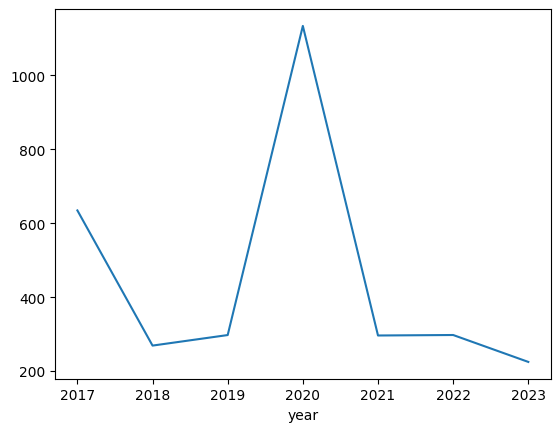

In [83]:
grafico=df_muestra.groupby('year')['total_homes_sold'].mean()
grafico.plot()

<Axes: xlabel='quarterly'>

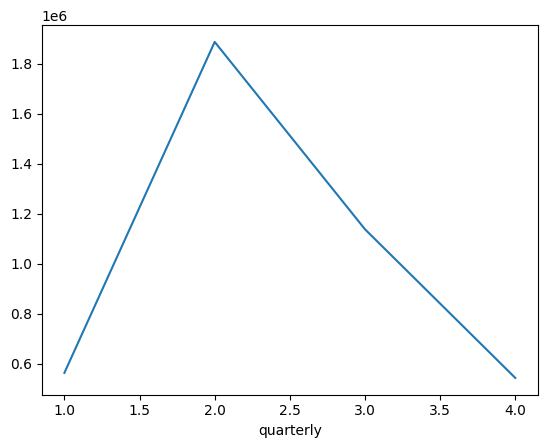

In [94]:
grafico2=df_muestra.groupby('quarterly')['total_homes_sold'].sum()
grafico2.plot()

<Axes: xlabel='year'>

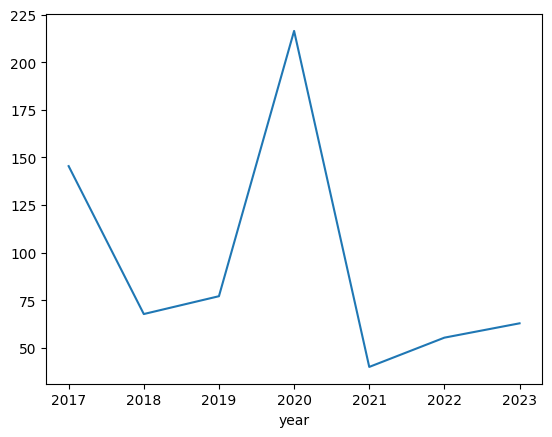

In [81]:
grafico3=df_muestra.groupby('year')['total_homes_sold_with_price_drops'].mean()
grafico3.plot()

<Axes: xlabel='year'>

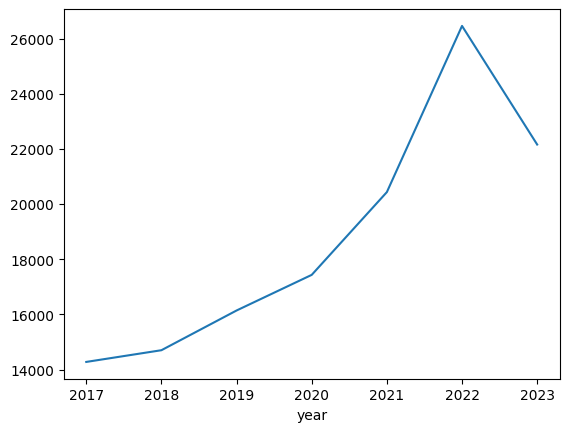

In [93]:
grafico4=df_muestra.groupby('year')['median_days_to_close'].sum()
grafico4.plot()

<Axes: xlabel='year'>

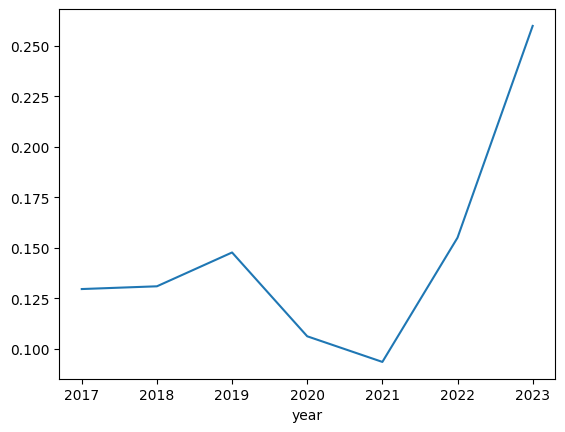

In [95]:

grafico5=df_muestra.groupby('year')['percent_homes_sold_with_price_drops'].mean()
grafico5.plot()

In [5]:
archivo = pd.read_csv('rawdata/Sale_Prices_State.csv',)

In [8]:
# Eliminar las columnas 'Unnamed: 0', 'RegionID' y 'SizeRank' del DataFrame archivo
archivo.drop(columns=['Unnamed: 0', 'RegionID', 'SizeRank'], inplace=True)

# Mostrar las primeras filas del DataFrame archivo
archivo.head()

,RegionName,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03
0,California,392500.0,373800.0,351800.0,334700.0,320100.0,306600.0,293300.0,279600.0,265600.0,...,493000,491900,491600,493800,498400,505600,513500,518700,524400,NaN
1,Texas,139900.0,139300.0,137600.0,137400.0,137700.0,139500.0,139600.0,139200.0,137100.0,...,226100,226700,228100,229400,232700,234700,236800,237200,239900,NaN
2,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,297000,298100,301700,295100,296000,297100,305400,308800,324800,342500.0
3,Florida,203400.0,195500.0,189300.0,184800.0,181700.0,178100.0,172700.0,167100.0,161900.0,...,224600,226100,227000,228900,230800,234400,238100,243300,247600,NaN
4,Illinois,204400.0,198400.0,185000.0,177500.0,174300.0,176300.0,176900.0,177400.0,173800.0,...,195900,192000,189500,188100,190000,191300,194600,195100,200200,210300.0


<Axes: >

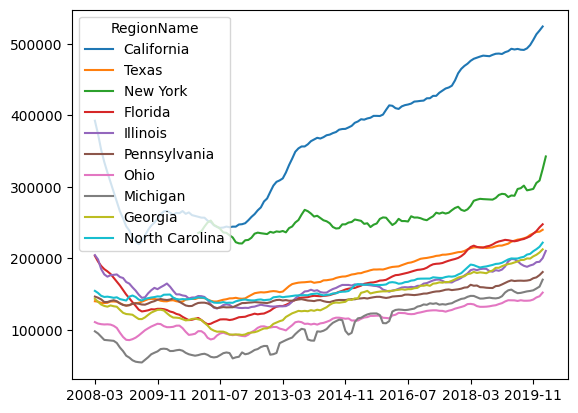

In [23]:
prueba=archivo.head(10).set_index('RegionName')

prueba=prueba.T
prueba.plot()

In [48]:
archivo2 = pd.read_csv('sales_count_month.csv')

In [49]:
archivo2.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31
0,102001,0,United States,country,NaN,160785.0,188435.0,208172.0,231377.0,242101.0,...,240432.0,228813.0,173218.0,192893.0,264982.0,245914.0,297124.0,311054.0,266987.0,275126.0
1,394913,1,"New York, NY",msa,NY,7538.0,7972.0,8710.0,9066.0,9664.0,...,11409.0,10641.0,8469.0,7077.0,8962.0,8083.0,9995.0,11985.0,10667.0,12497.0
2,753899,2,"Los Angeles, CA",msa,CA,3229.0,3914.0,4696.0,5257.0,5336.0,...,4695.0,4424.0,3581.0,3866.0,5661.0,5083.0,6075.0,6144.0,5360.0,6310.0
3,394463,3,"Chicago, IL",msa,IL,4285.0,5465.0,5838.0,6378.0,7163.0,...,6690.0,6108.0,4394.0,4553.0,7160.0,6994.0,8739.0,9511.0,7820.0,8267.0
4,394514,4,"Dallas, TX",msa,TX,4887.0,5682.0,6090.0,6801.0,6777.0,...,4833.0,4753.0,3471.0,4884.0,6169.0,5933.0,7398.0,7279.0,6304.0,6625.0


In [50]:
# Eliminar las columnas especificadas del DataFrame archivo2
archivo2.drop(columns=["SizeRank", "RegionName", "RegionType", "RegionID"], inplace=True)

# Agrupar por 'StateName', sumar las filas y reiniciar el índice
archivo2 = archivo2.groupby('StateName').sum().reset_index()

# Establecer 'StateName' como el nuevo índice
archivo2 = archivo2.set_index('StateName')

In [ ]:
# Seleccionar las filas a partir de la segunda y seleccionar la fila correspondiente a 'NY' del DataFrame archivo2
archivo2 = archivo2.iloc[1:, :].loc['NY']

# Transponer el DataFrame archivo2
archivo2 = archivo2.T

In [53]:
# Seleccionar la fila en la posición 1 del DataFrame archivo2
archivo2.iloc[1]

9968.0

In [54]:
archivo2

2008-02-29     9286.0
2008-03-31     9968.0
2008-04-30    11138.0
2008-05-31    11950.0
2008-06-30    13053.0
               ...   
2023-04-30     9713.0
2023-05-31    12212.0
2023-06-30    14651.0
2023-07-31    13364.0
2023-08-31    15583.0
Name: NY, Length: 187, dtype: float64